In [2]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv("Real estate.csv")
data.drop(data.columns[0],axis=1,inplace=True)
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
x,y = data.drop(data.columns[-1], axis=1), data[data.columns[-1]]

In [5]:
x.shape, y.shape

((414, 6), (414,))

## Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=108)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((331, 6), (83, 6), (331,), (83,))

## Standardising

In [8]:
scaler = StandardScaler()

In [9]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

## Modeling

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x_train_scaler,y_train)

LinearRegression()

In [12]:
reg.coef_

array([ 1.67415387, -2.79299074, -5.39768355,  3.35584662,  2.94920846,
       -0.24951085])

In [13]:
reg.intercept_

38.22567975830807

In [14]:
reg.score(x_test_scaler,y_test)

0.6980999272226441

In [15]:
preds = reg.predict(x_train_scaler)

In [16]:
math.sqrt(mean_squared_error(y_train,preds))

8.995291308370698

In [17]:
def train_test_rmse(x,y,epochs):
    scaled = StandardScaler()
    regger = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=108)
    x_train_scaled = scaled.fit_transform(x_train)
    x_test_scaled = scaled.transform(x_test)
    train_rmse=[]
    test_rmse=[]
    for i,j in zip(np.arange(0,len(x_train_scaled)+1,len(x_train_scaled)//epochs)[:-1],np.arange(0,len(x_test_scaled)+1,len(x_test_scaled)//epochs)[:-1]):
        if i==np.arange(0,len(x_train_scaled)+1,len(x_train_scaled)//epochs)[:-1][-1]:
#             print(i,j,len(x_test_scaler),len(y_test[j:]))
            regger.fit(x_train_scaler[i:],y_train[i:])
            train_rmse.append(math.sqrt(mean_squared_error(y_train[i:],regger.predict(x_train_scaled[i:]))))
            test_rmse.append(math.sqrt(mean_squared_error(y_test,regger.predict(x_test_scaled))))
#             test_rmse.append(math.sqrt(mean_squared_error(y_test[j:],regger.predict(x_test_scaler[j:]))))
        else:
#             print(i,j,len(y_test[j:j+(len(x_test_scaler)//epochs)]))
            regger.fit(x_train_scaler[i:i+(len(x_train_scaled)//epochs)],y_train[i:i+(len(x_train_scaled)//epochs)])
            train_rmse.append(math.sqrt(mean_squared_error(y_train[i:i+(len(x_train_scaler)//epochs)],regger.predict(x_train_scaled[i:i+(len(x_train_scaler)//epochs)]))))
            test_rmse.append(math.sqrt(mean_squared_error(y_test,regger.predict(x_test_scaler))))
#             test_rmse.append(math.sqrt(mean_squared_error(y_test[j:j+(len(x_test_scaler)//epochs)],regger.predict(x_test_scaler[j:j+(len(x_test_scaler)//epochs)]))))
    return np.array(train_rmse), np.array(test_rmse)

In [18]:
train_test_rmse(x,y,3)

(array([ 7.27445741, 11.21378652,  7.75012398]),
 array([8.10553562, 8.45312639, 7.84176885]))

In [19]:
epochs = int(input("Number of Epochs: "))
train_epo = []
test_epo = []
for i in range(1,epochs):
    train_rmse, test_rmse = train_test_rmse(x,y,i)
    train_epo.append(train_rmse.mean())
    test_epo.append(test_rmse.mean())

Number of Epochs: 10


C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


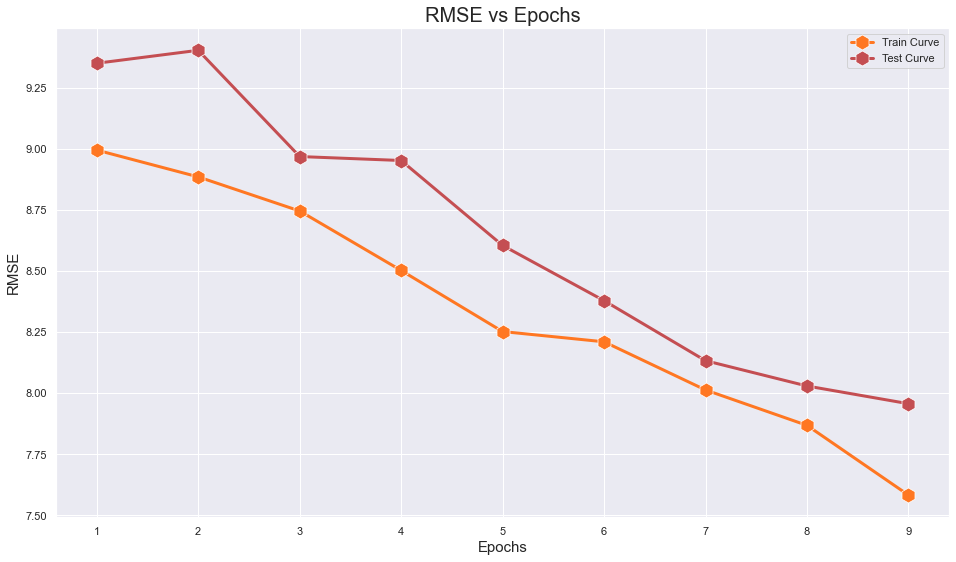

In [20]:
plt.figure(figsize=(16,9))
sns.lineplot(np.arange(1,epochs),np.array(train_epo),color="#FF7722",linewidth=3,marker="h",markersize=15)
sns.lineplot(np.arange(1,epochs),np.array(test_epo)[::-1],color="r",linewidth=3,marker="h",markersize=15)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("RMSE",fontsize=15)
plt.title("RMSE vs Epochs", fontsize=20)
plt.legend(['Train Curve', 'Test Curve'])
plt.show()